# Decison Tree Regression

In [22]:
import numpy as np
from sklearn import datasets,tree
import matplotlib.pyplot as plt

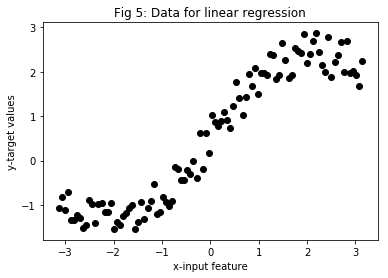

In [23]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

In [24]:
random_indices=np.random.permutation(number_of_samples)

x_train=x[random_indices[:70]]
y_train=y[random_indices[:70]]

x_val=x[random_indices[70:85]]
y_val=y[random_indices[70:85]]

x_test=x[random_indices[85:]]
y_test=y[random_indices[85:]]

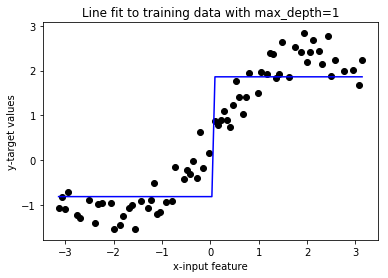

Training MSE:  0.310578496573 
Validation MSE:  0.262506126344 
Test MSE:  0.547034203075


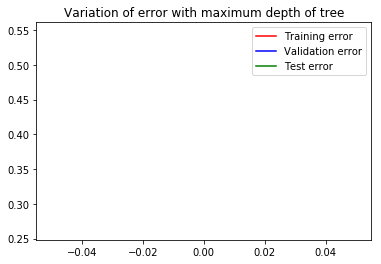

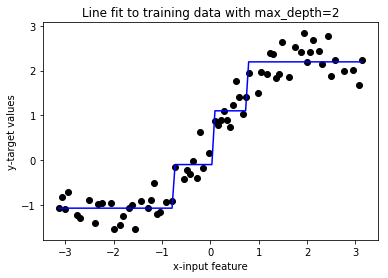

Training MSE:  0.0902439721764 
Validation MSE:  0.0956312473074 
Test MSE:  0.19758612731


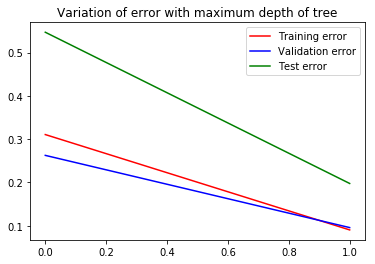

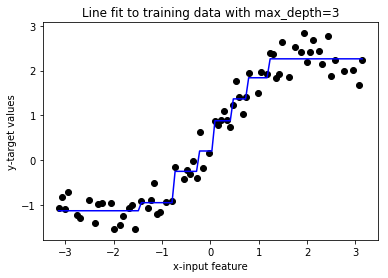

Training MSE:  0.06391469743 
Validation MSE:  0.0800303283268 
Test MSE:  0.108550251769


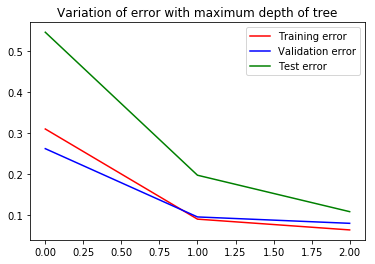

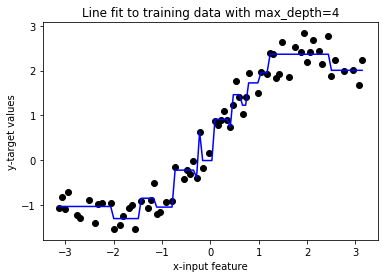

Training MSE:  0.0445441248518 
Validation MSE:  0.0900727199577 
Test MSE:  0.195134779222


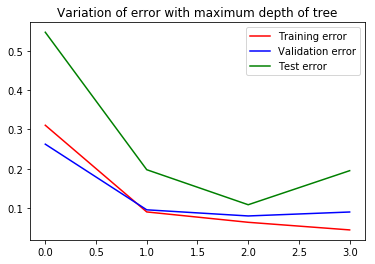

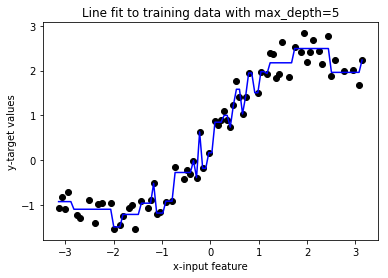

Training MSE:  0.0269712736215 
Validation MSE:  0.0846089922093 
Test MSE:  0.209780070155


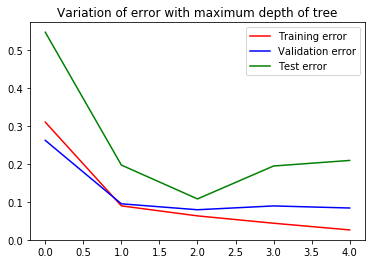

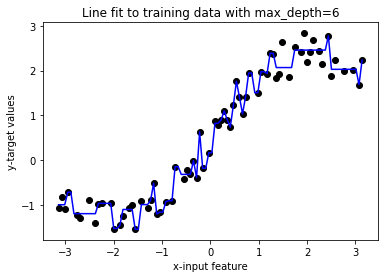

Training MSE:  0.016509902151 
Validation MSE:  0.0892397354225 
Test MSE:  0.195671689922


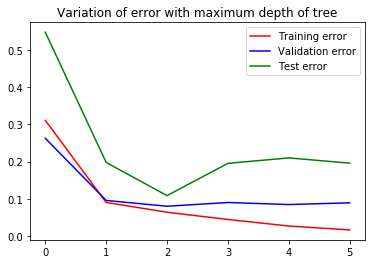

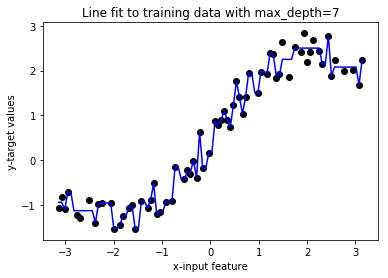

Training MSE:  0.0106959426209 
Validation MSE:  0.0928026991527 
Test MSE:  0.179906783838


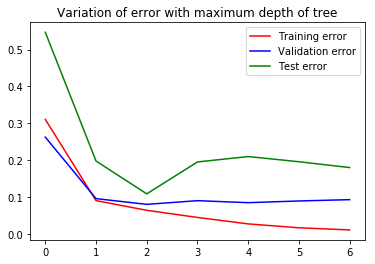

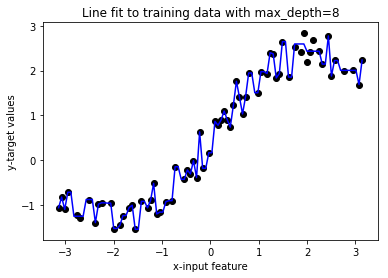

Training MSE:  0.00323604237869 
Validation MSE:  0.107345116024 
Test MSE:  0.186256158579


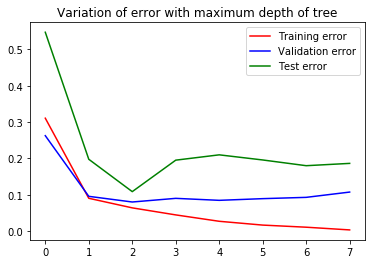

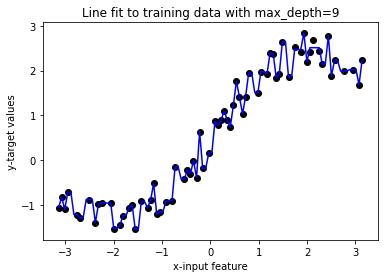

Training MSE:  0.000793101093551 
Validation MSE:  0.104348174625 
Test MSE:  0.186606654955


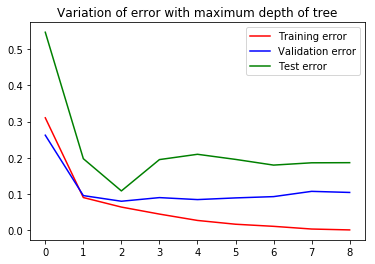

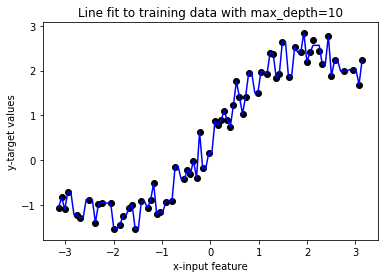

Training MSE:  0.000449508929914 
Validation MSE:  0.102169502042 
Test MSE:  0.186606654955


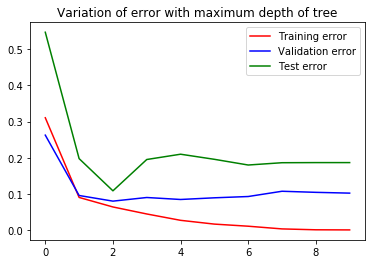

In [25]:
max_tree_depth=np.arange(10)+1
train_err=[]
test_err=[]
val_err=[]

for depth in max_tree_depth:
    model=tree.DecisionTreeRegressor(max_depth=depth)
    x_train_reshape=np.matrix(x_train.reshape(len(x_train),1))
    y_train_reshape=np.matrix(y_train.reshape(len(y_train),1))
    
    model.fit(x_train_reshape,y_train_reshape)
    
    
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err.append(mean_train_error)
    val_err.append(mean_val_error)
    test_err.append(mean_test_error)
    
    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
    plt.figure()
    plt.plot(train_err,c='red')
    plt.plot(val_err,c='blue')
    plt.plot(test_err,c='green')
    plt.legend(['Training error', 'Validation error', 'Test error'])
    plt.title('Variation of error with maximum depth of tree')
    plt.show()